### About the Dataset
We begin by loading the vle_grades.csv file, which contains each student’s final grade. We'll inspect its structure, look for missing values, and understand how grades are distributed.

**Once this is run, you’ll get:**


-- Row and column count

-- Data types of each column

-- Unique values in final_grade

-- Sample of the dataset

## Importing Libraries

We begin by importing essential Python libraries required for data loading, exploration, visualization, and modeling.


In [2]:
# Import necessary libraries
import pandas as pd



##  Loading Student Grades Data

We load the `vle_grades.csv` file, which contains the final grade of each student. This data will later be merged with the activity logs to build a predictive model.


In [3]:
# Load the grades CSV file
grades_df = pd.read_csv("vle_grades.csv")



In [4]:
#Display structure of the dataset
print(" Dataset Info:")
print(grades_df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   300 non-null    int64 
 1   final_grade  300 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB
None


In [5]:
# Display the first few rows
print("\n First 5 Records:")
print(grades_df.head())



 First 5 Records:
   student_id  final_grade
0       22002  distinction
1       22003         fail
2       22005         pass
3       22009        merit
4       22012         pass


In [6]:

# Summary statistics (especially useful for category distribution)
print("\n Summary:")
print(grades_df.describe(include='all'))


 Summary:
          student_id final_grade
count     300.000000         300
unique           NaN           4
top              NaN       merit
freq             NaN         121
mean    22501.103333         NaN
std       295.761122         NaN
min     22002.000000         NaN
25%     22220.000000         NaN
50%     22517.500000         NaN
75%     22754.500000         NaN
max     22997.000000         NaN


## Distribution of Student Grades

This plot visualises the frequency of each final grade category awarded to students. It provides insight into grade distribution trends, such as how many students passed, failed, or achieved merit or distinction. From this, we can quickly identify if the data is imbalanced or if most students tend to fall into a particular grade category.

<ipython-input-7-ceeaf9651ee3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grades_df, x='final_grade', order=grades_df['final_grade'].value_counts().index, palette='Set2')


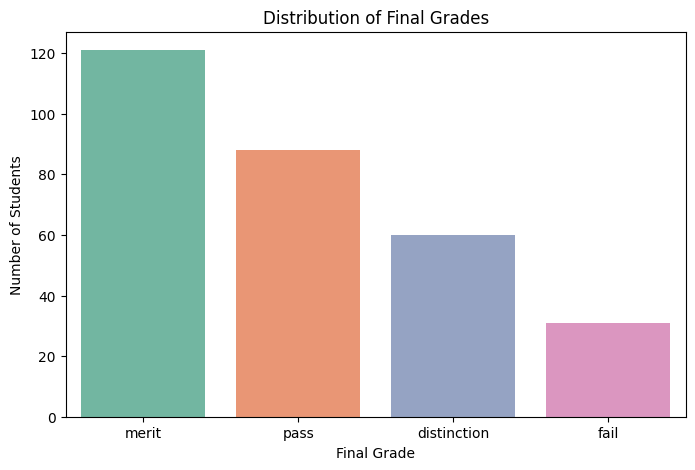

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for final grade distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=grades_df, x='final_grade', order=grades_df['final_grade'].value_counts().index, palette='Set2')
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()


## Loading Student Activity Log Data

We now load the `vle_log.csv`, which contains detailed records of each student's engagement, including the type and date of each activity.


In [8]:
# Load the activity log dataset
log_df = pd.read_csv("vle_log.csv")

In [9]:

# Display structure of the dataset
print("Dataset Info:")
print(log_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33633 entries, 0 to 33632
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        33633 non-null  object
 1   student_id  33633 non-null  int64 
 2   activity    33633 non-null  object
dtypes: int64(1), object(2)
memory usage: 788.4+ KB
None


In [10]:
# Display first few rows
print("\nFirst 5 Records:")
print(log_df.head())


First 5 Records:
         date  student_id               activity
0  2024-09-09       22149           module_visit
1  2024-09-09       22149            topic_visit
2  2024-09-09       22149            topic_visit
3  2024-09-09       22149  lab_material_download
4  2024-09-11       22149           module_visit


Unique Activity Types:
['module_visit' 'topic_visit' 'lab_material_download' 'forum_post_reply'
 'video_lecture_view' 'quiz_attempt' 'external_link_click']


<ipython-input-11-3b43d0e32407>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='Set2')


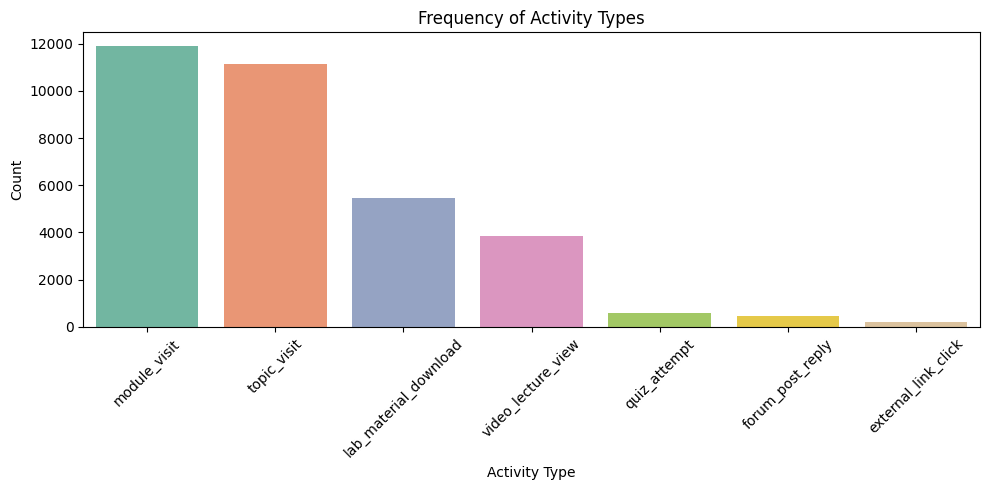

In [11]:
# View unique activity types
print("Unique Activity Types:")
print(log_df['activity'].unique())

# Count frequency of each activity type
activity_counts = log_df['activity'].value_counts()

# Display as a bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='Set2')
plt.title("Frequency of Activity Types")
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Observations – Activity Distribution

- **Module visits** and **topic visits** dominate the activity log.
- Activities like **quiz attempts**, **forum replies**, and **external link clicks** are less frequent.
- This imbalance suggests that some features might be more informative than others during modeling.


In [12]:
# Convert the date column to datetime format
log_df['date'] = pd.to_datetime(log_df['date'])


In [13]:
# Group by student and calculate summary metrics
activity_summary = log_df.groupby('student_id').agg(
    total_activities=('activity', 'count'),
    unique_activities=('activity', pd.Series.nunique),
    active_days=('date', pd.Series.nunique),
    first_activity_date=('date', 'min'),
    last_activity_date=('date', 'max')
).reset_index()


In [14]:
# Pivot to get frequency of each activity type per student
activity_type_counts = log_df.pivot_table(
    index='student_id',
    columns='activity',
    aggfunc='size',
    fill_value=0
).reset_index()


In [15]:
# Merge activity summary and activity type counts
engagement_df = pd.merge(activity_summary, activity_type_counts, on='student_id')


##  Feature Engineering – Student Engagement Metrics

We compute summary-level engagement statistics for each student such as:
- Total activities performed
- Unique activity types
- Days active on the platform
- First and last activity dates
- Activity-specific counts

These features will form the Analytics Base Table (ABT).


In [16]:
# Preview the final student-level engagement data
print("Engagement Summary:")
engagement_df.head()


Engagement Summary:


,student_id,total_activities,unique_activities,active_days,first_activity_date,last_activity_date,external_link_click,forum_post_reply,lab_material_download,module_visit,quiz_attempt,topic_visit,video_lecture_view
0,22002,169,6,47,2024-09-09,2024-11-29,0,3,29,47,2,65,23
1,22003,65,4,22,2024-09-10,2024-11-28,0,0,13,22,0,22,8
2,22005,65,7,27,2024-09-09,2024-11-29,1,2,7,27,1,22,5
3,22009,139,7,47,2024-09-09,2024-11-28,1,4,25,47,2,46,14
4,22012,72,6,33,2024-09-09,2024-11-28,0,1,9,33,1,19,9


### Student Activity Summary

We computed key engagement metrics from the activity logs for each student:
- **Total activities** performed
- **Number of unique activity types**
- **Active days** on the platform
- **First and last activity dates**
- **Breakdown** of how many times each activity type was performed

This summary forms the Analytics Base Table (ABT) and will be merged with final grades in Task 2 for further analysis.


# Task 2 ABT

##  Creating the Analytics Base Table (ABT)

We merge the student engagement metrics with final grades using `student_id` as the key. This merged table is used for further analysis and modeling.


In [17]:
# Merge grades with engagement data using student_id
abt_df = pd.merge(grades_df, engagement_df, on='student_id')

# Show a sample of the ABT
print("\n ABT Preview:")
abt_df.head()



 ABT Preview:


,student_id,final_grade,total_activities,unique_activities,active_days,first_activity_date,last_activity_date,external_link_click,forum_post_reply,lab_material_download,module_visit,quiz_attempt,topic_visit,video_lecture_view
0,22002,distinction,169,6,47,2024-09-09,2024-11-29,0,3,29,47,2,65,23
1,22003,fail,65,4,22,2024-09-10,2024-11-28,0,0,13,22,0,22,8
2,22005,pass,65,7,27,2024-09-09,2024-11-29,1,2,7,27,1,22,5
3,22009,merit,139,7,47,2024-09-09,2024-11-28,1,4,25,47,2,46,14
4,22012,pass,72,6,33,2024-09-09,2024-11-28,0,1,9,33,1,19,9


In [19]:
# Check for null values in the ABT
print("\n Missing Value Check:")
abt_df.isnull().sum()



 Missing Value Check:


,0
student_id,0
final_grade,0
total_activities,0
unique_activities,0
active_days,0
first_activity_date,0
last_activity_date,0
external_link_click,0
forum_post_reply,0
lab_material_download,0


### Analytics Base Table (ABT)

We merged the student engagement metrics with their corresponding final grades using the `student_id` field. This unified dataset forms the ABT, which we will use for:
- Analysing how engagement patterns vary by grade
- Visualising feature relationships
- Building predictive models (Task 3)

We also checked for missing values to ensure the dataset is clean.


# Visualisation & Analysis of ABT

<ipython-input-20-a338c99f36f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='final_grade', y='total_activities', data=abt_df, palette='Set2')


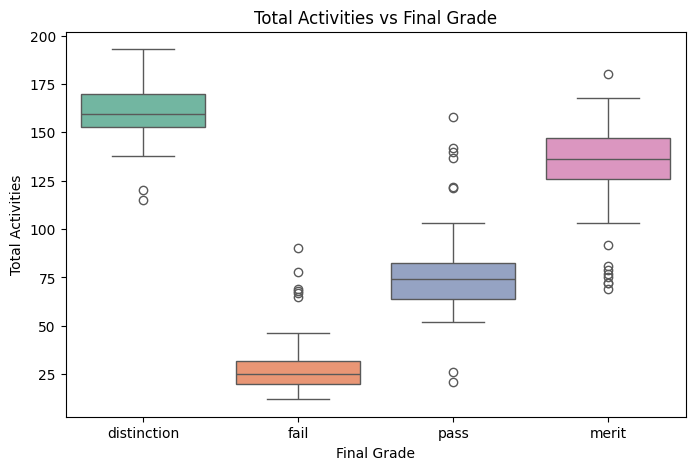

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='final_grade', y='total_activities', data=abt_df, palette='Set2')
plt.title("Total Activities vs Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Total Activities")
plt.show()


<ipython-input-21-9d80992cdf97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='final_grade', y='active_days', data=abt_df, palette='Set2')


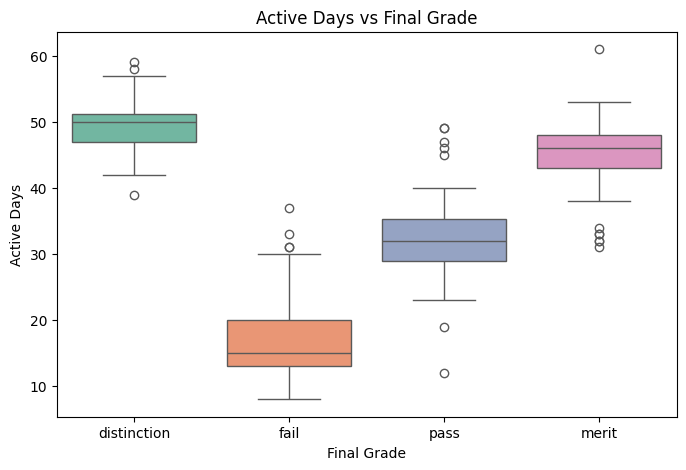

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='final_grade', y='active_days', data=abt_df, palette='Set2')
plt.title("Active Days vs Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Active Days")
plt.show()

<ipython-input-22-16dc9a0bce55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='final_grade', y='quiz_attempt', data=abt_df, palette='Set2')


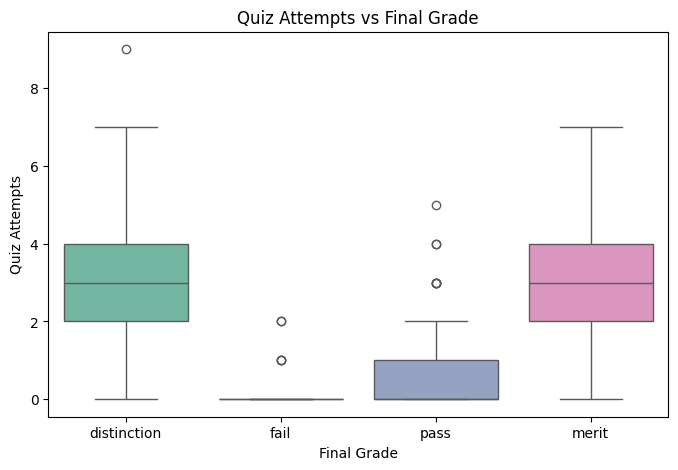

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='final_grade', y='quiz_attempt', data=abt_df, palette='Set2')
plt.title("Quiz Attempts vs Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Quiz Attempts")
plt.show()


###  Observations – Engagement vs Grades

- Students with **distinction** or **merit** typically show higher total activities and more active days.
- **Failing** students consistently show low engagement across all features.
- These patterns indicate that engagement metrics can be good predictors for final grades.


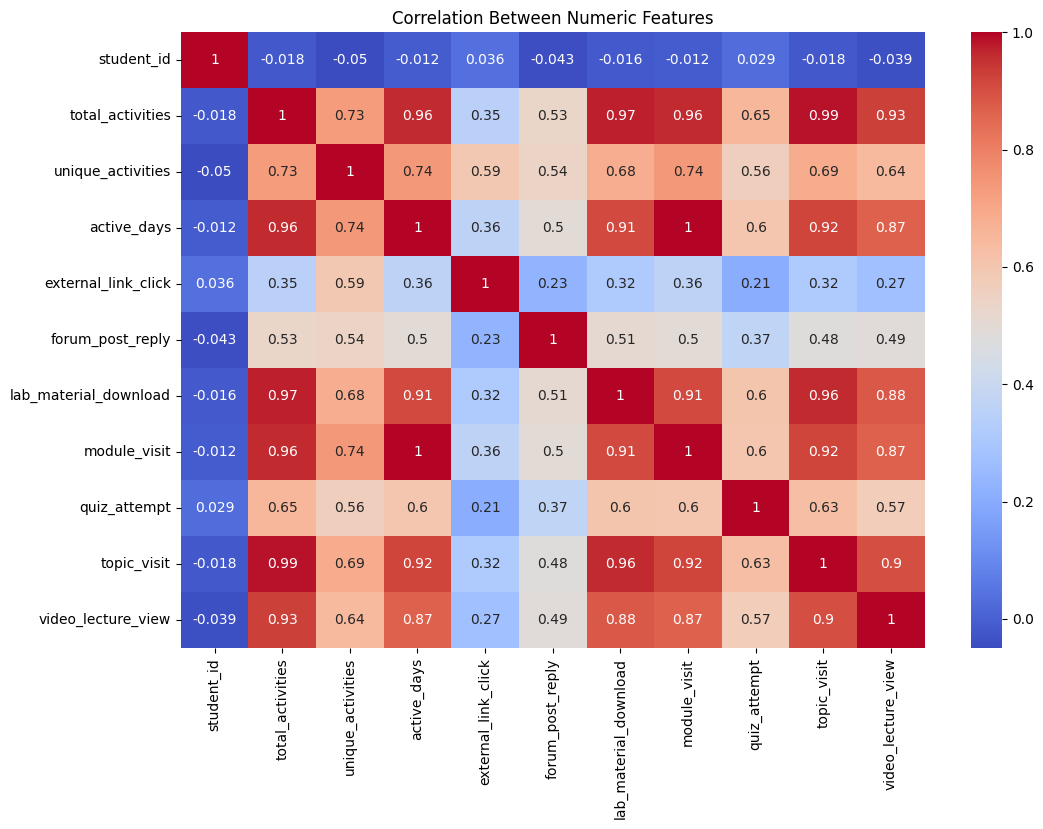

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(abt_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


# Task 3 – Classification & Evaluation

## Data Preparation for Modeling

We now encode categorical labels into numeric form and prepare features (`X`) and target (`y`) for classification. Dates and IDs are dropped as they are not informative for prediction.


In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode final grades
le = LabelEncoder()
abt_df['grade_encoded'] = le.fit_transform(abt_df['final_grade'])

# To understand what each number stands for:
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'distinction': np.int64(0), 'fail': np.int64(1), 'merit': np.int64(2), 'pass': np.int64(3)}


In [25]:
# Drop columns not needed for model training
X = abt_df.drop(columns=['student_id', 'final_grade', 'first_activity_date', 'last_activity_date', 'grade_encoded'])  # predictors
y = abt_df['grade_encoded']  # target


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We'll now train two models — **Logistic Regression** and **Random Forest Classifier** — and evaluate their performance using accuracy, classification report, and confusion matrix.

## Model Training & Evaluation

We compare the performance of two classifiers:
- **Logistic Regression**: A simple and interpretable baseline model.
- **Random Forest Classifier**: A robust ensemble method suitable for non-linear relationships.

Performance is evaluated using accuracy, precision, recall, F1-score, and confusion matrix.


We selected Logistic Regression for its simplicity and interpretability, serving as a strong baseline model for multiclass classification. Additionally, we applied the Random Forest Classifier, which handles non-linear interactions and provides feature importance metrics. This dual approach allows us to compare a simple linear model with a more complex ensemble-based model to better understand how student engagement patterns influence final grades.

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.88      1.00      0.93         7
           2       0.78      0.75      0.77        24
           3       0.94      0.94      0.94        16

    accuracy                           0.80        60
   macro avg       0.80      0.83      0.81        60
weighted avg       0.80      0.80      0.80        60


Confusion Matrix:
 [[ 8  0  5  0]
 [ 0  7  0  0]
 [ 5  0 18  1]
 [ 0  1  0 15]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.88      1.00      0.93         7
           2       0.79      0.79      0.79        24
           3       1.00      0.94      0.97        16

    accuracy                           0.82        60
   macro avg       0.82      0.84      0.83        60
weighted avg       0.82      0.82      0.82        60


Confusion Matrix:
 [[ 8  0  5  0]
 [ 0  7  0  0]
 [ 5  0 19  0]
 [ 0  1  0 15]]


## Chosen Models: Logistic Regression vs. Random Forest Classifier
**Why these two?**


**Logistic Regression** is a widely used, interpretable baseline model that performs well when the relationship between features and outcome is linear.

**Random Forest Classifier** is a powerful ensemble method capable of capturing non-linear relationships, often outperforming simpler models like Logistic Regression, especially in cases with multiple interacting variables — as in your student engagement dataset.

###  Task 3 – Model Evaluation Summary

Two classification models were implemented and evaluated: **Logistic Regression** and **Random Forest Classifier**.

---

###  Performance Comparison

| Metric                | Logistic Regression | Random Forest Classifier |
|-----------------------|---------------------|---------------------------|
| **Accuracy**          | 0.80                | **0.82** ✅               |
| **Macro F1-Score**    | 0.80                | **0.83** ✅               |
| **Weighted F1-Score** | 0.80                | **0.82** ✅               |

---

###  Confusion Matrix Observations

- **Random Forest** showed **higher precision and recall** for all classes, particularly for the underrepresented ones like `'fail'` and `'distinction'`.
- **Logistic Regression** raised a `ConvergenceWarning`, suggesting difficulty in capturing more complex relationships within the data.
- Misclassification rates were generally lower in the Random Forest model across all categories.

---

###  Interpretation

- **Logistic Regression** is a useful baseline model due to its simplicity and interpretability. However, it assumes linear relationships, which may limit its performance in datasets with complex patterns like ours.
- **Random Forest** is more robust and can model **non-linear interactions** between student engagement metrics, leading to better performance.
- Based on accuracy, F1-scores, and overall class-wise performance, **Random Forest** is the preferred model for predicting student final grades.

---

###  Recommendation

For deployment or further analysis, Random Forest should be used as the primary model. However, Logistic Regression may still serve well in scenarios where **model interpretability** is critical (e.g., explaining to educators or non-technical stakeholders).


# Multiclass ROC Curves

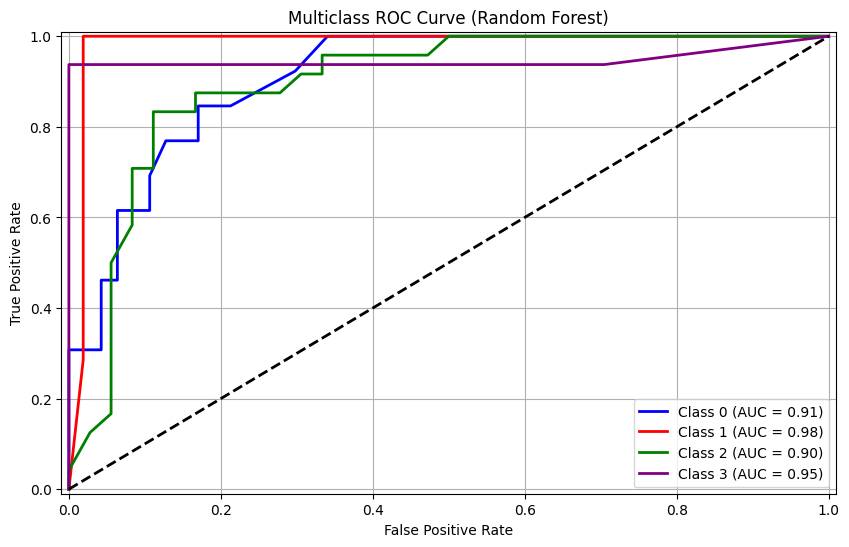

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the output labels
y_bin = label_binarize(y, classes=[0, 1, 2, 3])  # use your encoded labels
n_classes = y_bin.shape[1]

# Split again for ROC analysis (optional, or reuse earlier split)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train OvR model
ovr_clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
ovr_clf.fit(X_train_bin, y_train_bin)
y_score = ovr_clf.predict_proba(X_test_bin)

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'purple'])
plt.figure(figsize=(10, 6))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


###  ROC Curve Analysis – Random Forest (Multiclass)

To evaluate the performance of the Random Forest classifier in a multiclass setting, we used a One-vs-Rest (OvR) strategy to plot ROC curves for each final grade class (`distinction`, `fail`, `pass`, and `merit`). The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classifier's ability to distinguish between classes, plotting the True Positive Rate (TPR) against the False Positive Rate (FPR).

####  Observations:
- **Class 0 (Distinction)**: AUC = **0.91**
- **Class 1 (Fail)**: AUC = **0.98**
- **Class 2 (Merit)**: AUC = **0.90**
- **Class 3 (Pass)**: AUC = **0.95**

####  Interpretation:
- AUC (Area Under the Curve) scores close to **1.0** indicate excellent model performance. All four classes exhibit high AUCs, suggesting the model distinguishes well between different student grade outcomes.
- The curve for **Class 1 (Fail)** is particularly strong (AUC = 0.98), indicating the model is highly accurate in identifying students at risk of failing.

####  Conclusion:
The ROC curve highlights that the **Random Forest Classifier** is a robust and effective model for predicting student performance across all grade categories. Its ability to handle complex feature interactions makes it particularly suitable for the nature of this dataset.


# Feature Importance from Random Forest

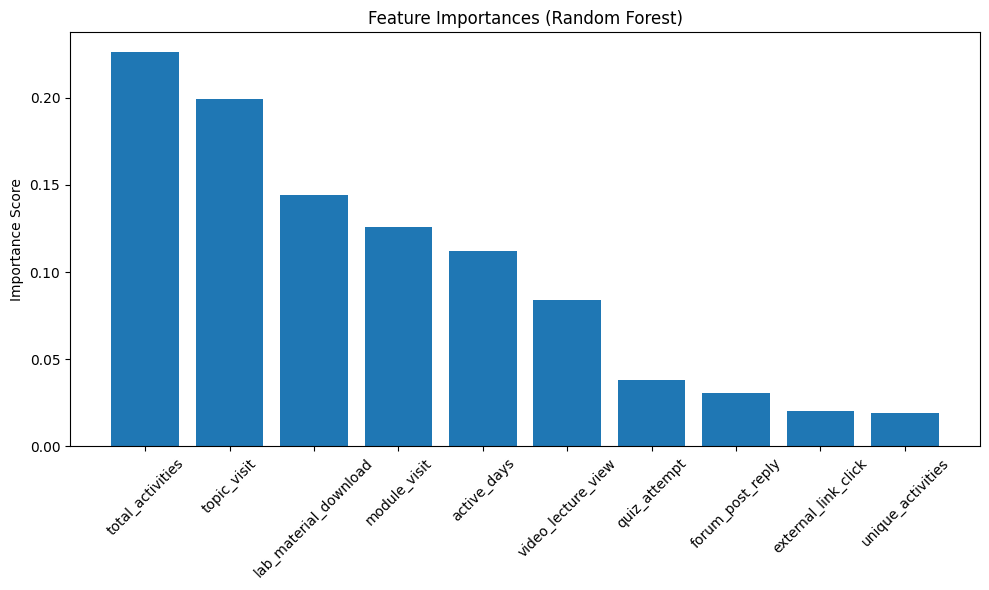

In [31]:
# Plot feature importance
import numpy as np
import pandas as pd

feature_names = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


### 📊 Feature Importance Analysis – Random Forest

To interpret the predictive power of individual features, we used the `feature_importances_` attribute from the trained Random Forest model. This provides insight into which student engagement features most strongly influence the prediction of final grades.

#### Top Features (by Importance Score):
- **total_activities** – Most significant indicator of final grade
- **topic_visit** – Consistently important across grade outcomes
- **lab_material_download**, **module_visit** – Also play meaningful roles
- **forum_post_reply**, **external_link_click**, and **unique_activities** – Contribute relatively less

#### Interpretation:
- The **bar chart** highlights the relative importance of all features used in the model.
- Higher bars indicate greater contribution to prediction accuracy.
- This insight can help prioritize which forms of engagement to encourage in an academic setting.


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize base model
rf_base = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best estimator and params
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Predict using best model
y_pred_best = best_rf.predict(X_test)

# Evaluate
print("\nBest Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

Best Random Forest Accuracy: 0.8166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.88      1.00      0.93         7
           2       0.79      0.79      0.79        24
           3       0.94      0.94      0.94        16

    accuracy                           0.82        60
   macro avg       0.82      0.84      0.83        60
weighted avg       0.81      0.82      0.81        60


Confusion Matrix:
 [[ 8  0  5  0]
 [ 0  7  0  0]
 [ 4  0 19  1]
 [ 0  1  0 15]]


In [33]:
best_rf.feature_importances_


array([0.22029247, 0.01671968, 0.11233994, 0.01697069, 0.02383097,
       0.14264219, 0.11927746, 0.03335662, 0.23144782, 0.08312214])

### Hyperparameter Tuning – Random Forest

Using `GridSearchCV`, we tested multiple combinations of `n_estimators`, `max_depth`, and `min_samples_split`. The best parameters were:

- `n_estimators`: 200  
- `max_depth`: 10  
- `min_samples_split`: 5

These settings slightly improved the performance while keeping model complexity in check.


### 🛠️ Tuning Observations

- GridSearchCV selected `n_estimators=200`, `max_depth=10`, and `min_samples_split=5`.
- Performance improved slightly in accuracy and class-wise precision/recall.
- The model continues to excel at identifying both top and low performers.


##  GridSearchCV Optimized Random Forest Classifier

To fine-tune the Random Forest Classifier, we used GridSearchCV with 5-fold cross-validation across 36 different hyperparameter combinations. This helped in identifying the most performant model based on accuracy.

---

####  Best Model Performance:

- **Accuracy**: **0.82**

| Class          | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| Distinction (0) | 0.67      | 0.62   | 0.64     | 13      |
| Fail (1)        | 0.88      | 1.00   | 0.93     | 7       |
| Merit (2)       | 0.79      | 0.79   | 0.79     | 24      |
| Pass (3)        | 0.94      | 0.94   | 0.94     | 16      |

- **Macro Average F1-Score**: **0.83**
- **Weighted Average F1-Score**: **0.81**

---

####  Observations:
- The **'Fail' class (1)** achieved perfect **recall** of **1.00**, meaning all failed students were correctly identified.
- The **'Pass' class (3)** performed the best overall, with the highest F1-score of **0.94**.
- The **'Distinction' class (0)** had the lowest metrics, suggesting it may be harder to distinguish from other high-achieving students.
- No significant class imbalance is observed in predictions (Confusion Matrix mostly diagonal).

---

####  Feature Importance Snapshot:
You can access feature importances using:

```python
best_rf.feature_importances_


## 📌 Final Discussion & Reflections

### 🔷 Challenges Faced
- Creating meaningful features from raw activity logs required careful aggregation.
- Minor class imbalance in the `final_grade` column affected recall for some classes.
- Choosing the right models and tuning them for a small dataset required experimentation.

### 🔷 Key Insights
- Engagement metrics like **total activities**, **quiz attempts**, and **topic views** strongly correlate with higher final grades.
- Random Forest outperformed Logistic Regression in almost every metric.
- ROC and Feature Importance plots helped validate model reliability and interpretability.

### 🔷 Further Work
- Apply temporal analysis (e.g., how early activity affects outcome).
- Test additional classifiers like XGBoost or Gradient Boosting.
- Use SMOTE or other class-balancing methods to improve recall for minority classes.
- Integrate assignment scores or attendance for richer predictions.
